## METR-LA Dataset

In [1]:
from tsl.datasets import MetrLA, PemsBay

In [2]:
dataset = MetrLA('./data/METR-LA', impute_zeros=True)

download: 0.00B [00:00, ?B/s]

download: 13.1MB [00:01, 7.83MB/s]                            
/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/tsl/datasets/metr_la.py:98: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(df.index[0], df.index[-1], freq='5T')
/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/tsl/datasets/metr_la.py:109: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df = df.replace(to_replace=0., method='ffill')


In [11]:
edge_index, edge_attr = dataset.get_connectivity(
    threshold=0.1,
    include_self=False,
    normalize_axis=1,
    layout="edge_index"
)

In [12]:
df = dataset.dataframe()

In [13]:
import torch

raw_data = torch.from_numpy(df.values).unsqueeze(2)

In [14]:
T, n_nodes, _ = raw_data.shape

S = 288
I = T // S
reshaped_data = raw_data.view(I, S, n_nodes, 1)

In [15]:
reshaped_data.shape

torch.Size([119, 288, 207, 1])

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

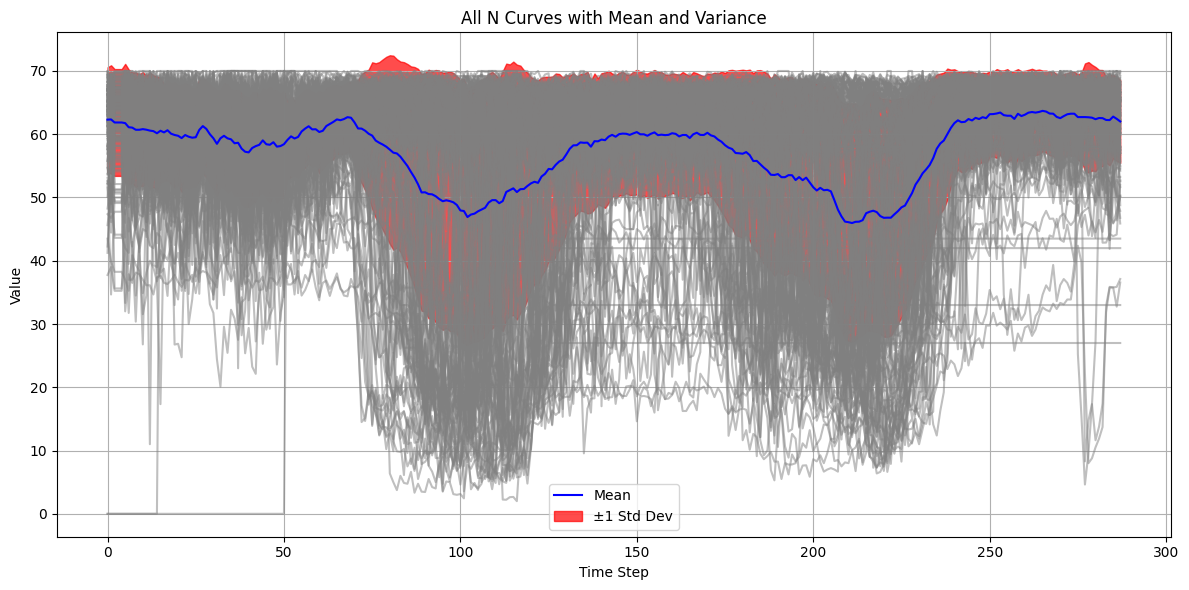

In [27]:
data_np = reshaped_data[0].squeeze(-1).cpu().detach().numpy()

# Time axis
x = np.arange(data_np.shape[0])

# Compute mean and std over axis=1 (N)
mean = data_np.mean(axis=1)
std = data_np.std(axis=1)

# Plot
plt.figure(figsize=(12, 6))

# Plot all individual curves
for i in range(data_np.shape[1]):
    plt.plot(x, data_np[:, i], color='gray', alpha=0.5)

# Plot mean curve
plt.plot(x, mean, color='blue', label='Mean')

# Plot ±1 std dev (variance) as shaded region
plt.fill_between(x, mean - std, mean + std, color='red', alpha=0.7, label='±1 Std Dev')

# Decorations
plt.title('All N Curves with Mean and Variance')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
from tsl.data.preprocessing.scalers import MinMaxScaler

In [18]:
scaler = MinMaxScaler(out_range=(-1, 1))
scaled_data = scaler.fit_transform(df.values)

In [21]:
scaled_data_reshaped = torch.from_numpy(scaled_data).unsqueeze(2).view(I, S, n_nodes, 1)

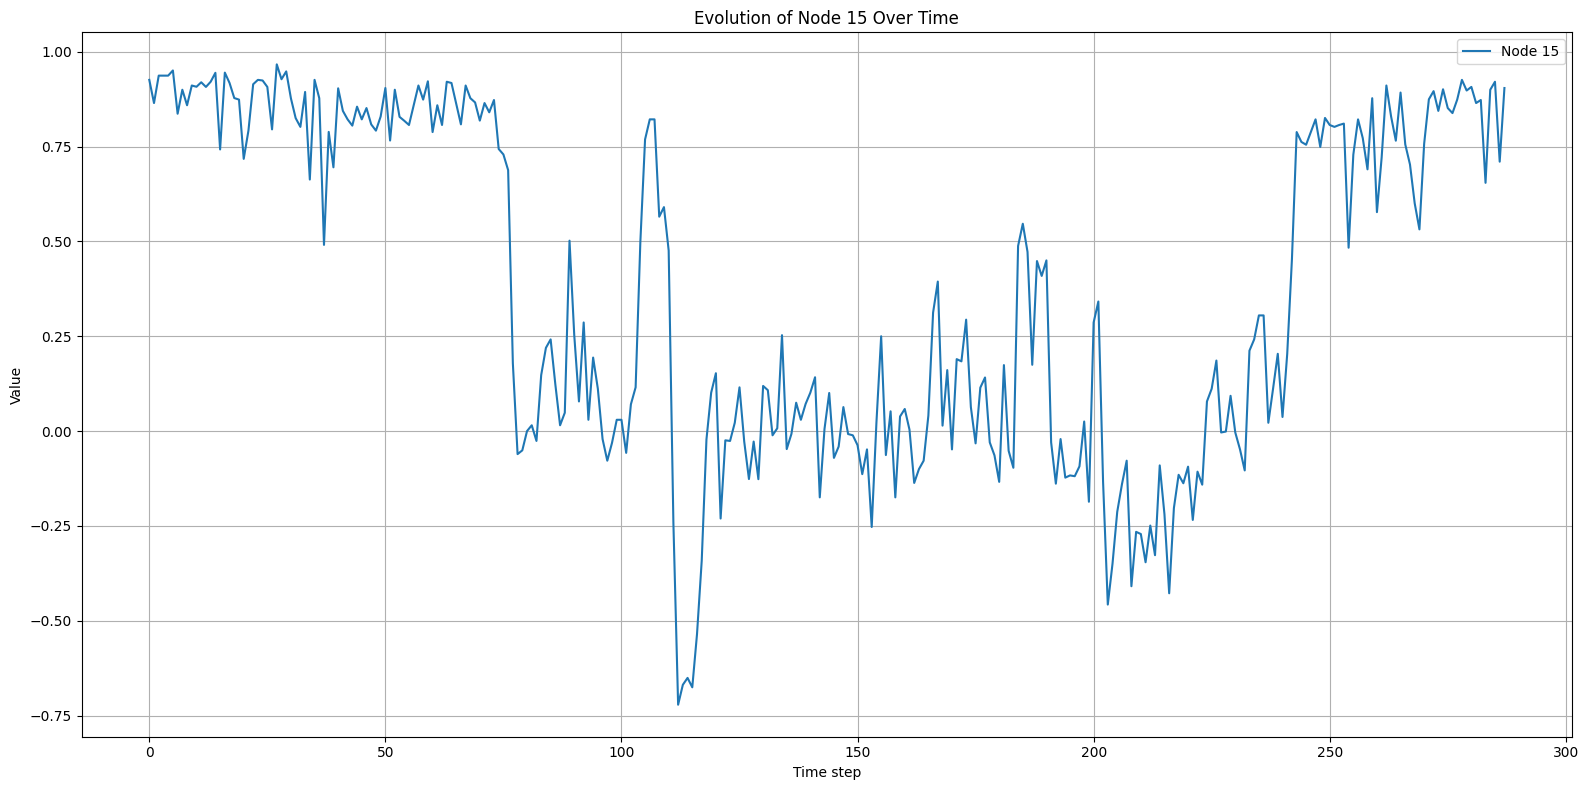

In [23]:
data_np = scaled_data_reshaped[0].cpu().detach().numpy()
node_index = 15

plt.figure(figsize=(16, 8))
plt.plot(data_np[:, node_index, :], label=f'Node {node_index}')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title(f'Evolution of Node {node_index} Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
reshaped_data = reshaped_data[:3]

In [25]:
from utils.utils import sample_irregularly_per_ics


data_sampled, t_sampled = sample_irregularly_per_ics(
    data = reshaped_data,
    time = torch.linspace(0, 1, reshaped_data.size(1)).repeat(reshaped_data.size(0), 1),
    num_samples=30
)

/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/juliacall/__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [26]:
data_sampled.shape

torch.Size([3, 30, 207, 1])